# Problem Statment 
## Perform clustering (K means ) for the crime data to obtain optimum number of clusters.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#for eastwestAirlines
df=pd.read_csv('https://raw.githubusercontent.com/AliHumadi2000/Cluster02/main/crime_data.csv')


In [3]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
#EDA
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [5]:
#columns name, counts,shapes ,dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
#null and duplicated
df.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [7]:
df.duplicated().sum()#no duplicated value found

0

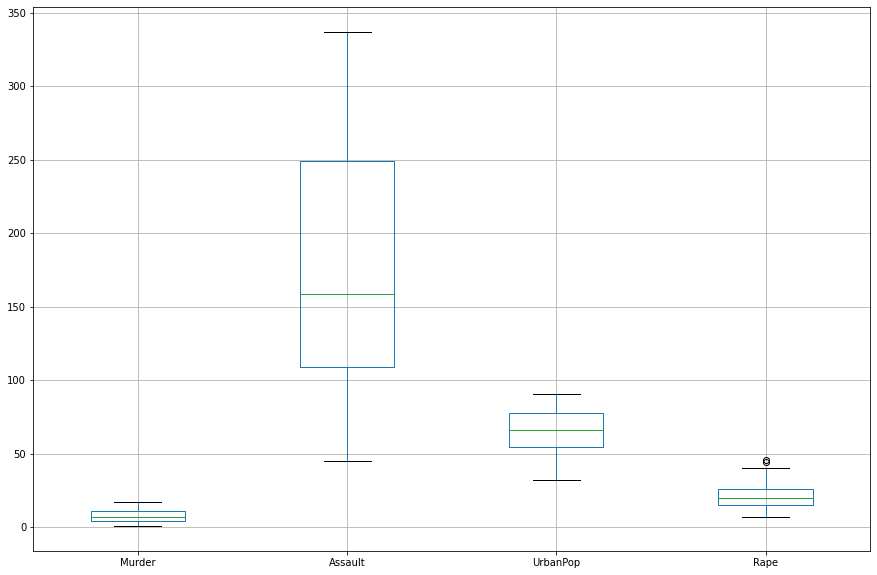

In [8]:
# chech outliers 
plt.figure(figsize=(15,10))
df.boxplot()
plt.show()

In [12]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [15]:
df['Unnamed: 0']

0            Alabama
1             Alaska
2            Arizona
3           Arkansas
4         California
5           Colorado
6        Connecticut
7           Delaware
8            Florida
9            Georgia
10            Hawaii
11             Idaho
12          Illinois
13           Indiana
14              Iowa
15            Kansas
16          Kentucky
17         Louisiana
18             Maine
19          Maryland
20     Massachusetts
21          Michigan
22         Minnesota
23       Mississippi
24          Missouri
25           Montana
26          Nebraska
27            Nevada
28     New Hampshire
29        New Jersey
30        New Mexico
31          New York
32    North Carolina
33      North Dakota
34              Ohio
35          Oklahoma
36            Oregon
37      Pennsylvania
38      Rhode Island
39    South Carolina
40      South Dakota
41         Tennessee
42             Texas
43              Utah
44           Vermont
45          Virginia
46        Washington
47     West V

In [17]:
#rename the first columns
df.rename(columns={'Unnamed: 0' : 'State'},inplace=True)

In [18]:
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [21]:
enco=LabelEncoder()
df['State']=enco.fit_transform(df['State'])
df['State'].value_counts()

0     1
37    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
38    1
1     1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
26    1
25    1
24    1
23    1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
49    1
Name: State, dtype: int64

In [24]:
df.iloc[:,1:]

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [27]:
#create a model
#first lets scale the data
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X= ms.fit_transform(df)

In [28]:
X[1,1:]

array([0.55421687, 0.74657534, 0.27118644, 0.96124031])

In [30]:
#create new data frame for the scaling data 
df_new=pd.DataFrame(X,columns=[df.columns])
df_new.head()

,State,Murder,Assault,UrbanPop,Rape
0,0.000000,0.746988,0.654110,0.440678,0.359173
1,0.020408,0.554217,0.746575,0.271186,0.961240
2,0.040816,0.439759,0.852740,0.813559,0.612403
3,0.061224,0.481928,0.496575,0.305085,0.315245
4,0.081633,0.493976,0.791096,1.000000,0.860465


In [16]:
# #remove ID#
# df_new.dr
# df_new.head()

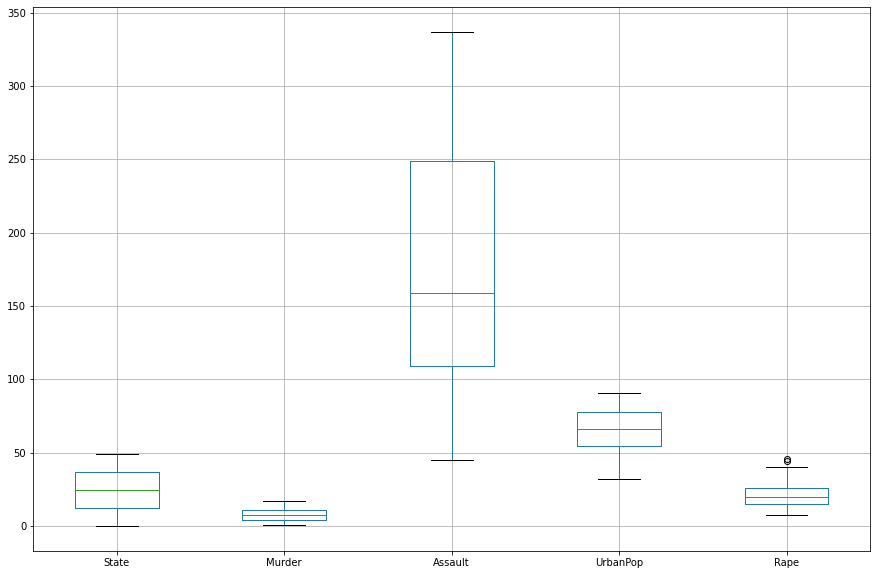

In [31]:
#check outliers again
# chech outliers 
plt.figure(figsize=(15,10))
df.boxplot()
plt.show()

In [40]:
#first initilize 3 cluster
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(df_new)

KMeans(n_clusters=2, random_state=0)

In [41]:
kmeans.cluster_centers_

array([[0.60349854, 0.23450947, 0.21342955, 0.53934625, 0.22019195],
       [0.36827458, 0.65826944, 0.70719178, 0.605547  , 0.53793751]])

In [42]:
kmeans.inertia_

10.325376650233052

In [43]:
# Check quality of weak classification by the model 
labels = kmeans.labels_
labels

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

# Use elbow method to find optimal number of clusters

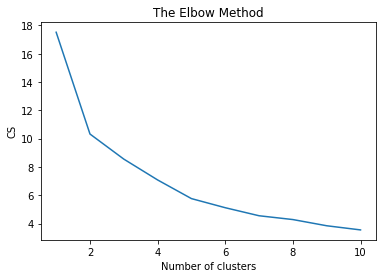

In [44]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_new)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()


In [47]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(df_new)

labels = kmeans.labels_
labels

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

# Now Let's use Hierarchical Clustering 

In [48]:
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score

In [49]:

# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(df_new) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)


,P1,P2
0,0.451180,-0.232037
1,0.638676,-0.190730


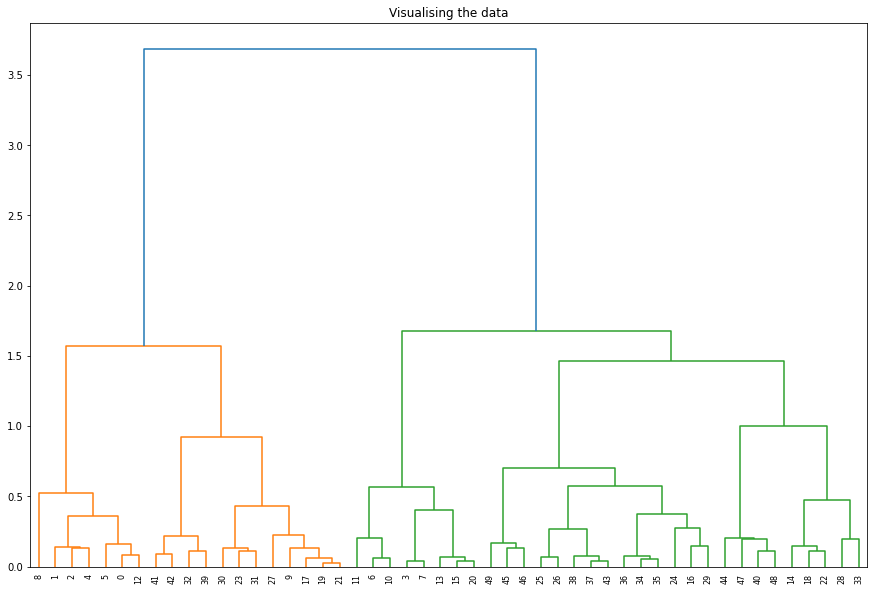

In [50]:
plt.figure(figsize =(15, 10)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 

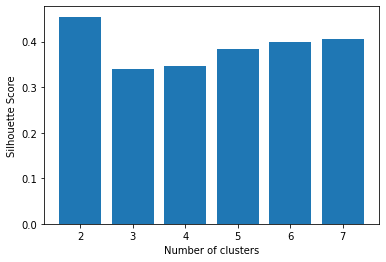

In [51]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
    silhouette_score(X_principal, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [52]:
#build the model with 4 cluster 
agg = AgglomerativeClustering(n_clusters=2)
agg.fit(X_principal)

AgglomerativeClustering()

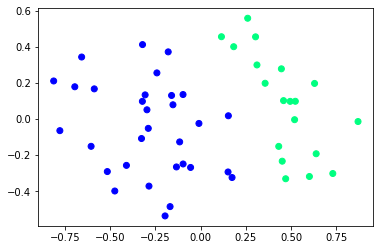

In [54]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = 2).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

# DBSCAN Clustring 

In [58]:
from sklearn.cluster import DBSCAN

In [ ]:
#We need to calculate the eps and MinPoints 
#minpoints=2*number of dim ->> 2*2 =minPoints=4
#To Calculate the number of eps we need to calculate the neighbors 

In [57]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=3) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(X_principal) # fitting the data to the object
distances,indices=nbrs.kneighbors(X_principal) #

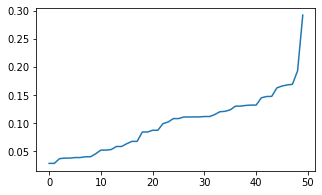

In [59]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showi

In [ ]:
#number of eps is 2

In [60]:
db=DBSCAN(eps=2,min_samples=4,metric='euclidean')

In [61]:
#we'll fit the model with data that we used in previuos model
model=db.fit(X_principal)

In [62]:
label=model.labels_
label


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [63]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 1


In [64]:
y_means = db.fit_predict(X_principal)
y_means


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

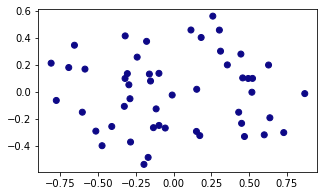

In [66]:
# Plot the clusters
plt.scatter(X_principal['P1'], X_principal['P2'], c = label, cmap= "plasma") # plotting the clusters

plt.show() # showing the plot